# Membuat Klasifikasi Data Asuransi 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset dari device C(Downloads)

data_asuransi_train = pd.read_csv("../Downloads/Dataset Joints/Asuransi J/train_data.csv")
data_asuransi_test = pd.read_csv("../Downloads/Dataset Joints/Asuransi J/test_data.csv")

## 1. Mengolah Data Train (Pre-processing)

In [6]:
data_asuransi_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,Pria,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0
2,345428,Wanita,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0
3,236831,Pria,58.0,1.0,46.0,NaN,1-2 Tahun,NaN,124.0,NaN,0
4,280181,Pria,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1


In [7]:
data_asuransi_train.isnull().sum()

id                         0
Gender                 31768
Umur                   96258
Izin_Mengemudi         76647
Kode_Wilayah           84074
Tanggal_Asuransi       78084
Tahun_Kendaraan        66440
Biaya                 126537
Sourcing_Channel       83645
Hari_Diasuransikan     75666
Target                     0
dtype: int64

Karena di dalam dataframe data_asuransi_train masih terdapat banyak sekali data yang kosong, maka kami akan melakukan pengolahan terlebih dahulu untuk mengatasi kolom yang terdapat data kosong.

In [8]:
# Mengubah kategori dari tipe data string menjadi tipe integer (numerik) untuk kolom Gender
from sklearn.preprocessing import OneHotEncoder 

data_asuransi_train['Gender'] = pd.factorize(data_asuransi_train.Gender) [0]
data_asuransi_train["Gender"] = pd.get_dummies(data_asuransi_train["Gender"])
data_asuransi_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,0,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0
1,208222,0,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0
2,345428,0,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0
3,236831,0,58.0,1.0,46.0,NaN,1-2 Tahun,NaN,124.0,NaN,0
4,280181,0,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1


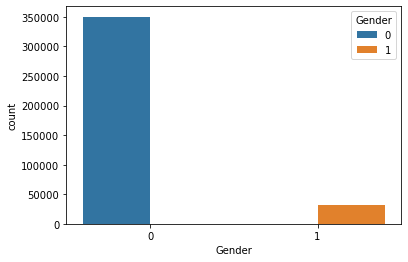

<Figure size 720x720 with 0 Axes>

In [9]:
# Membuat visualsasi untuk kolom Gender

sns.countplot(x="Gender", hue="Gender", data=data_asuransi_train)
plt.figure(figsize=(10, 10))
plt.show()

Selanjutnya kami mengubah tipe data untuk kolom Tanggal_Asuransi dan Tahun_Kendaraan menjadi integer.

In [10]:
data_asuransi_train["Tanggal_Asuransi"] = pd.to_datetime(data_asuransi_train["Tanggal_Asuransi"], errors='coerce')
data_asuransi_train["Tanggal_Asuransi"].fillna(method='bfill', inplace=True)

data_asuransi_train['Tahun_Kendaraan'] = pd.factorize(data_asuransi_train.Tahun_Kendaraan) [0]
data_asuransi_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,0,65.0,1.0,48.0,2018-11-04,-1,2630.0,15.0,131.0,0
1,208222,0,22.0,1.0,21.0,2018-02-02,0,NaN,NaN,NaN,0
2,345428,0,24.0,1.0,NaN,2019-05-12,0,NaN,NaN,181.0,0
3,236831,0,58.0,1.0,46.0,2019-11-19,1,NaN,124.0,NaN,0
4,280181,0,NaN,1.0,36.0,2019-11-19,2,NaN,NaN,NaN,1


Namun jika dilihat pada tahapan preprocessing untuk Tanggal_Asuransi, tipe data yang digunakan masih tipe data datetime, maka kami harus mengubahnya menjadi integer karena dalam melakukan pengujian algoritma tidak bisa mengolah tipe data datetime.

In [11]:
# Mengubah tipe data Tanggal_Asuransi menjadi integer

data_asuransi_train['Tanggal_Asuransi'] = data_asuransi_train['Tanggal_Asuransi'].apply(lambda x: x.toordinal())
data_asuransi_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,0,65.0,1.0,48.0,737002,-1,2630.0,15.0,131.0,0
1,208222,0,22.0,1.0,21.0,736727,0,NaN,NaN,NaN,0
2,345428,0,24.0,1.0,NaN,737191,0,NaN,NaN,181.0,0
3,236831,0,58.0,1.0,46.0,737382,1,NaN,124.0,NaN,0
4,280181,0,NaN,1.0,36.0,737382,2,NaN,NaN,NaN,1


Dan kami akan mencoba untuk membuatkan sebuah visualisasi timeseries dari kolom Tanggal_Asuransi berdasarkan dari kolom umur (Gender). Namun untuk visualisasi ini, kami mengubah tipe data dari kolom Tanggal_Asuransi menjadi tipe data integer.

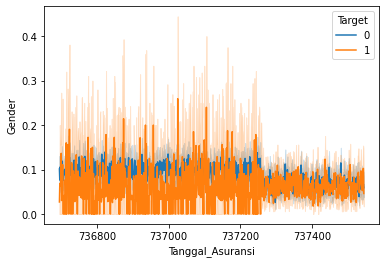

<Figure size 720x720 with 0 Axes>

In [12]:
# Membuat visualisasi time series berdasarkan Tanggal_Asuransi untuk kolom Gender dengan nilai hue=Target
sns.lineplot(data=data_asuransi_train, x="Tanggal_Asuransi", y="Gender", hue="Target")
plt.figure(figsize=(10, 10))
plt.show()

Namun karena masih terlihat banyak data yang kosong (NaN), kami melakukan sebuah proses pengisian data kosong dengan nilai mean dari setiap kolom agar tidak menjadi data yang kosong.

In [13]:
# Mengganti nillai data yang NaN dengan nilai mean (Rata-rata) dari setiap kolom

mean = data_asuransi_train.mean()
data_asuransi_train = data_asuransi_train.replace(np.nan, mean)
data_asuransi_train.head(10)

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,0,65.000000,1.000000,48.000000,737002,-1,2630.000000,15.000000,131.000000,0
1,208222,0,22.000000,1.000000,21.000000,736727,0,31183.756781,110.872007,154.168995,0
2,345428,0,24.000000,1.000000,26.406032,737191,0,31183.756781,110.872007,181.000000,0
3,236831,0,58.000000,1.000000,46.000000,737382,1,31183.756781,124.000000,154.168995,0
4,280181,0,38.916592,1.000000,36.000000,737382,2,31183.756781,110.872007,154.168995,1
5,31680,0,55.000000,1.000000,28.000000,737403,1,54135.000000,52.000000,285.000000,0
6,52488,1,23.000000,1.000000,50.000000,737297,0,31183.756781,110.872007,145.000000,0
7,278334,0,72.000000,1.000000,28.000000,737297,2,31183.756781,122.000000,242.000000,0
8,129322,0,23.000000,0.998815,26.406032,737287,0,33007.000000,124.000000,154.168995,0
9,316145,0,38.916592,1.000000,26.406032,736975,1,53322.000000,110.872007,154.168995,0


In [14]:
data_asuransi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              382154 non-null  uint8  
 2   Umur                382154 non-null  float64
 3   Izin_Mengemudi      382154 non-null  float64
 4   Kode_Wilayah        382154 non-null  float64
 5   Tanggal_Asuransi    382154 non-null  int64  
 6   Tahun_Kendaraan     382154 non-null  int64  
 7   Biaya               382154 non-null  float64
 8   Sourcing_Channel    382154 non-null  float64
 9   Hari_Diasuransikan  382154 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(4), uint8(1)
memory usage: 29.5 MB


In [15]:
data_asuransi_train.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
Target                0
dtype: int64

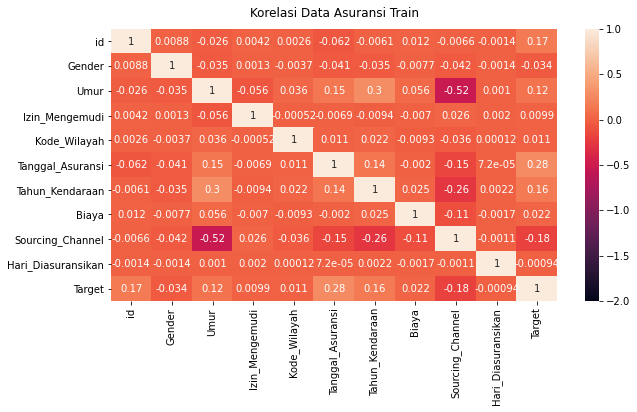

In [16]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(10, 5))

korelasi_data_asuransi_train = sns.heatmap(data_asuransi_train.corr(), vmin=-2, vmax=1, annot=True)
korelasi_data_asuransi_train.set_title("Korelasi Data Asuransi Train", fontdict={"fontsize":12}, pad=12);

Keterangan pada visualisasi di atas:
1. vmin, vmax = kisaran nilai yang memiliki fungsi sebagai dasar peta warna
2. annot = Jika memberikan nilai True, maka nilai setiap korelasi menjadi terlihat pada sel yang berwarna. Sedangkan false, nilai korelasinya akan sangat memudar dan tidak terlihat.

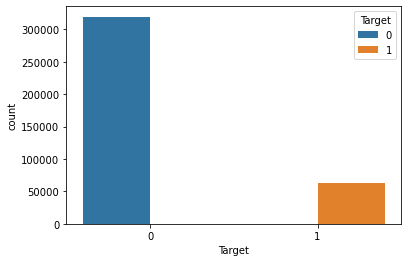

<Figure size 720x720 with 0 Axes>

In [17]:
# Visualisasi kolom Target dari variable output

sns.countplot(x="Target", hue="Target", data=data_asuransi_train)
plt.figure(figsize=(10, 10))
plt.show()
# 0 = Tidak meneruskan layanan asuransi & 1 = Meneruskan layanan asuransi

## 2. Mengolah Data Test (Pre-processing)

In [18]:
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN,193.0
1,49175,Pria,25.0,1.0,30.0,4/14/2018,<1 Tahun,NaN,152.0,153.0
2,353494,Wanita,50.0,1.0,19.0,12/25/2019,NaN,31641.0,124.0,278.0
3,182676,Wanita,59.0,NaN,NaN,5/4/2018,1-2 Tahun,2630.0,26.0,202.0
4,498206,Wanita,57.0,NaN,28.0,4/17/2019,1-2 Tahun,26357.0,122.0,142.0


In [19]:
data_asuransi_test.isnull().sum()

id                        0
Gender                 7578
Umur                  15581
Izin_Mengemudi        15713
Kode_Wilayah          19553
Tanggal_Asuransi      11252
Tahun_Kendaraan       13551
Biaya                 20847
Sourcing_Channel      13239
Hari_Diasuransikan    17220
dtype: int64

Karena dalam data test masih terdapat data yang kosong, maka kami akan melakukan pengolahan terlebih dahulu supaya dapat di proses dalam memakai algoritma pengujian.

In [20]:
# Mengubah kategori dari tipe data string menjadi tipe integer (numerik)
data_asuransi_test['Gender'] = pd.factorize(data_asuransi_test.Gender) [0]
data_asuransi_test["Gender"] = pd.get_dummies(data_asuransi_test["Gender"])
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,1,NaN,1.0,11.0,NaN,NaN,NaN,NaN,193.0
1,49175,0,25.0,1.0,30.0,4/14/2018,<1 Tahun,NaN,152.0,153.0
2,353494,0,50.0,1.0,19.0,12/25/2019,NaN,31641.0,124.0,278.0
3,182676,0,59.0,NaN,NaN,5/4/2018,1-2 Tahun,2630.0,26.0,202.0
4,498206,0,57.0,NaN,28.0,4/17/2019,1-2 Tahun,26357.0,122.0,142.0


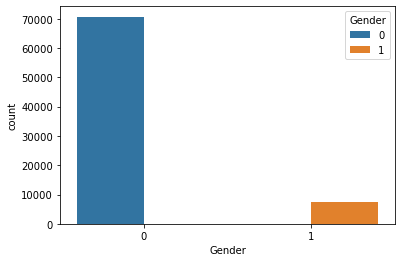

<Figure size 720x720 with 0 Axes>

In [21]:
# Membuat visualisasi untuk kolom Gender

sns.countplot(x="Gender", hue="Gender", data=data_asuransi_test)
plt.figure(figsize=(10, 10))
plt.show()

Selanjutnya kami mengubah tipe data untuk kolom Tanggal_Asuransi dan Tahun_Kendaraan yang berawal adalah string/object, kami ubah menjadi integer.

In [22]:
# Perubahan tipe data Tanggal Asuransi menjadi datetime sekaligus mengisi nilai yang kosong

data_asuransi_test["Tanggal_Asuransi"] = pd.to_datetime(data_asuransi_test["Tanggal_Asuransi"], errors='coerce')
data_asuransi_test["Tanggal_Asuransi"].fillna(method='bfill', inplace=True)

# Perubahan pada kolom tipe data Tahun_Kendaraan yang berawal adalah string menjadi integer

data_asuransi_test['Tahun_Kendaraan'] = pd.factorize(data_asuransi_test.Tahun_Kendaraan) [0]
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,1,NaN,1.0,11.0,2018-04-14,-1,NaN,NaN,193.0
1,49175,0,25.0,1.0,30.0,2018-04-14,0,NaN,152.0,153.0
2,353494,0,50.0,1.0,19.0,2019-12-25,-1,31641.0,124.0,278.0
3,182676,0,59.0,NaN,NaN,2018-05-04,1,2630.0,26.0,202.0
4,498206,0,57.0,NaN,28.0,2019-04-17,1,26357.0,122.0,142.0


Namun jika dilihat pada tahapan preprocessing untuk Tanggal_Asuransi, tipe data yang digunakan masih tipe data datetime, maka kami harus mengubahnya menjadi integer karena dalam melakukan pengujian algoritma tidak bisa mengolah tipe data datetime.

In [23]:
data_asuransi_test['Tanggal_Asuransi'] = data_asuransi_test['Tanggal_Asuransi'].apply(lambda x: x.toordinal())
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,1,NaN,1.0,11.0,736798,-1,NaN,NaN,193.0
1,49175,0,25.0,1.0,30.0,736798,0,NaN,152.0,153.0
2,353494,0,50.0,1.0,19.0,737418,-1,31641.0,124.0,278.0
3,182676,0,59.0,NaN,NaN,736818,1,2630.0,26.0,202.0
4,498206,0,57.0,NaN,28.0,737166,1,26357.0,122.0,142.0


Dan kami akan mencoba untuk membuatkan sebuah visualisasi timeseries dari kolom Tanggal_Asuransi berdasarkan dari kolom umur (Gender). Namun untuk visualisasi ini, kami mengubah tipe data dari kolom Tanggal_Asuransi menjadi tipe data integer.

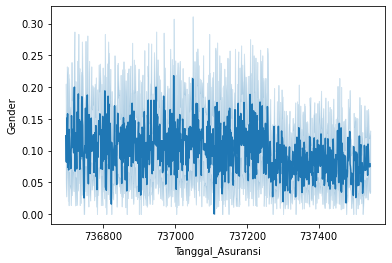

<Figure size 720x720 with 0 Axes>

In [24]:
# Membuat visualisasi time series berdasarkan Tanggal_Asuransi untuk kolom Gender
sns.lineplot(data=data_asuransi_test, x="Tanggal_Asuransi", y="Gender")
plt.figure(figsize=(10, 10))
plt.show()

In [25]:
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,1,NaN,1.0,11.0,736798,-1,NaN,NaN,193.0
1,49175,0,25.0,1.0,30.0,736798,0,NaN,152.0,153.0
2,353494,0,50.0,1.0,19.0,737418,-1,31641.0,124.0,278.0
3,182676,0,59.0,NaN,NaN,736818,1,2630.0,26.0,202.0
4,498206,0,57.0,NaN,28.0,737166,1,26357.0,122.0,142.0


Karena masih terlihat banyak data yang kosong (NaN), kami melakukan sebuah proses pengisian data kosong dengan nilai mean dari setiap kolom agar tidak menjadi data yang kosong.

In [26]:
# Mengganti atau mengisi nilai NaN menjadi nilai Mean

mean = data_asuransi_test.mean()
data_asuransi_test = data_asuransi_test.replace(np.nan, mean)
data_asuransi_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan
0,273737,1,41.207092,1.000000,11.000000,736798,-1,31888.958329,108.169696,193.0
1,49175,0,25.000000,1.000000,30.000000,736798,0,31888.958329,152.000000,153.0
2,353494,0,50.000000,1.000000,19.000000,737418,-1,31641.000000,124.000000,278.0
3,182676,0,59.000000,0.998449,26.415497,736818,1,2630.000000,26.000000,202.0
4,498206,0,57.000000,0.998449,28.000000,737166,1,26357.000000,122.000000,142.0


In [27]:
data_asuransi_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78273 non-null  int64  
 1   Gender              78273 non-null  uint8  
 2   Umur                78273 non-null  float64
 3   Izin_Mengemudi      78273 non-null  float64
 4   Kode_Wilayah        78273 non-null  float64
 5   Tanggal_Asuransi    78273 non-null  int64  
 6   Tahun_Kendaraan     78273 non-null  int64  
 7   Biaya               78273 non-null  float64
 8   Sourcing_Channel    78273 non-null  float64
 9   Hari_Diasuransikan  78273 non-null  float64
dtypes: float64(6), int64(3), uint8(1)
memory usage: 5.4 MB


In [28]:
data_asuransi_test.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
dtype: int64

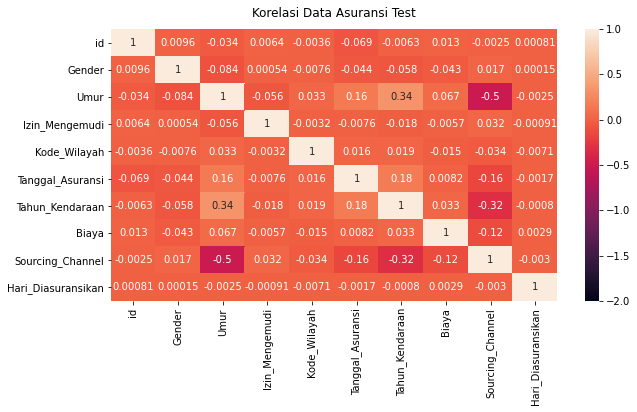

In [29]:
# Membuat korelasi untuk dataframe data_asuransi_test
plt.figure(figsize=(10, 5))

korelasi_data_asuransi_test = sns.heatmap(data_asuransi_test.corr(), vmin=-2, vmax=1, annot=True)
korelasi_data_asuransi_test.set_title("Korelasi Data Asuransi Test", fontdict={"fontsize":12}, pad=12);

Keterangan pada visualisasi di atas:
1. vmin, vmax = kisaran nilai yang memiliki fungsi sebagai dasar peta warna
2. annot = Jika memberikan nilai True, maka nilai setiap korelasi menjadi terlihat pada sel yang berwarna. Sedangkan false, nilai korelasinya akan sangat memudar dan tidak terlihat.

## 3. Menentukan Algoritma Untuk Data Test

Menentukan isi dari variabel dependen dan independen. Untuk variabel dependen, kami mengisinya dengan kolom Target dari variabel data_asuransi_train sedangkan untuk variabel independennya merupakan semua kolom kecuali kolom Target.

In [30]:
x = data_asuransi_train.drop("Target", axis=1)
y = data_asuransi_train["Target"]

data_asuransi_train.sort_values(by=["id"], inplace=True)

In [31]:
# Menentukan variable train dan variable test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

In [38]:
y_train

346105    0
83896     0
120488    0
186992    1
367513    0
         ..
339799    0
253799    0
210755    0
56088     0
300552    1
Name: Target, Length: 305723, dtype: int64

In [32]:
# Menentukan algoritma
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

model = RandomForestClassifier(n_estimators=100)

# Fitting variable 
model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# Melihat tingkat akurasi dari algoritma Random Forest Classification
from sklearn.metrics import accuracy_score

print("Nilai model akurasi random forest:", accuracy_score(y_test, y_pred))

Nilai model akurasi random forest: 0.884758802056757


In [35]:
# Melakukan pengukuran performa 
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[63301   681]
 [ 8127  4322]]


In [36]:
# Mencetak tingkat akurasi, nilai precision, recall, dan mean f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     63982
           1       0.86      0.35      0.50     12449

    accuracy                           0.88     76431
   macro avg       0.88      0.67      0.72     76431
weighted avg       0.88      0.88      0.86     76431



Keterangan:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [33]:
y_test_pred = model.predict(data_asuransi_test)

In [34]:
output = pd.DataFrame({'id' : data_asuransi_test["id"], 'Target' : y_test_pred})
output

,id,Target
0,273737,0
1,49175,0
2,353494,0
3,182676,0
4,498206,0
...,...,...
78268,456819,0
78269,202443,0
78270,368881,0
78271,145064,0


In [35]:
output.to_csv("Downloads/Dataset Joints/Asuransi J/submission1.csv", index=False)

In [36]:
output = pd.read_csv('Downloads/Dataset Joints/Asuransi J/submission1.csv')

## 4. Membuat Visualisasi Untuk Variable Output 

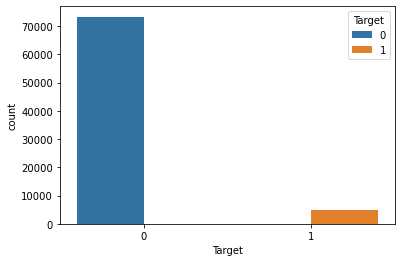

<Figure size 720x720 with 0 Axes>

In [37]:
# Visualisasi kolom Target dari variable output

sns.countplot(x="Target", hue="Target", data=output)
plt.figure(figsize=(10, 10))
plt.show()
# 0 = Tidak meneruskan layanan asuransi & 1 = Meneruskan layanan asuransi

Jika pada visualisasi di atas kami membuatkan grafik dengan kolom target sebagai variabel independen (x), kali ini, kami membuatkan sebuah visualisasi menggunakan seaborn tetapi kolom target kami jadikan sebagai variabel dependen (y). Hasilnya dapat dilihat pada hasil di bawah:

<AxesSubplot:xlabel='count', ylabel='Target'>

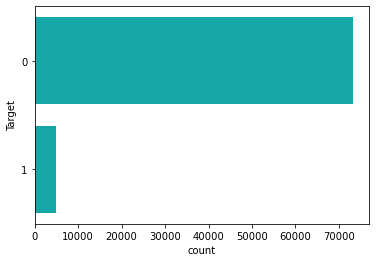

In [38]:
# Membuat visualisasi dengan kolom Target sebagai variabel independen (x)
sns.countplot(y="Target", data=output, color="c")

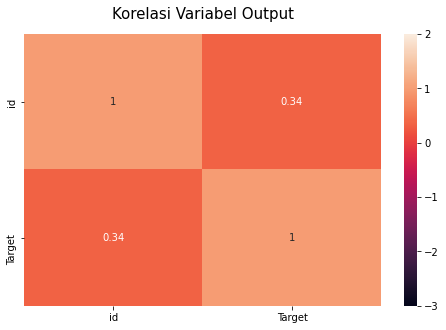

In [39]:
# Membuat visualisasi korelasi dari variable output
plt.figure(figsize=(8, 5))

korelasi_data_asuransi = sns.heatmap(output.corr(), vmin=-3, vmax=2, annot=True)
korelasi_data_asuransi.set_title("Korelasi Variabel Output", fontdict={"fontsize":15}, pad=15);

Keterangan pada visualisasi di atas:
1. vmin, vmax = kisaran nilai yang memiliki fungsi sebagai dasar peta warna
2. annot = Jika memberikan nilai True, maka nilai setiap korelasi menjadi terlihat pada sel yang berwarna. Sedangkan false, nilai korelasinya akan sangat memudar dan tidak terlihat.

Selanjutnya kami membuatkan visualisasi menggunakan pairplot dari library seaborn. Pairplot sendiri biasa digunakan untuk melihat distribusi atribut tunggal atau hubungan 2 atribut data.

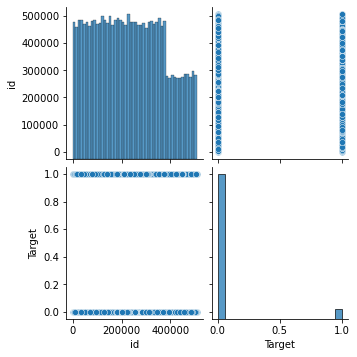

In [40]:
# Membuat visualisasi dari pairplot untuk melihat distribusi dari variable output (Kolom id & Target)
sns.pairplot(output)